In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r'Data_Train.xlsx')

In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [8]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.dropna(inplace=True)

# EDA

In [11]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Journey_Day']=df['Date_of_Journey'].dt.day
df['Journey_Month']=df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [12]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Dep_Hour']=df['Dep_Time'].dt.hour
df['Dep_Min']=df['Dep_Time'].dt.minute
df.drop('Dep_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [13]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour']=df['Arrival_Time'].dt.hour
df['Arrival_Min']=df['Arrival_Time'].dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [14]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:     
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"    
        else:
            duration[i] = "0h " + duration[i]  

In [15]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [16]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [17]:
df.drop('Duration',axis=1,inplace=True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


## Handling categorical data

One can find many ways to handle categorical data. Some of them categorical data are,

<ul>1.Nominal data --> data are not in any order --> OneHotEncoder is used in this case
<br>2.Ordinal data --> data are in order --> LabelEncoder is used in this case

In [19]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

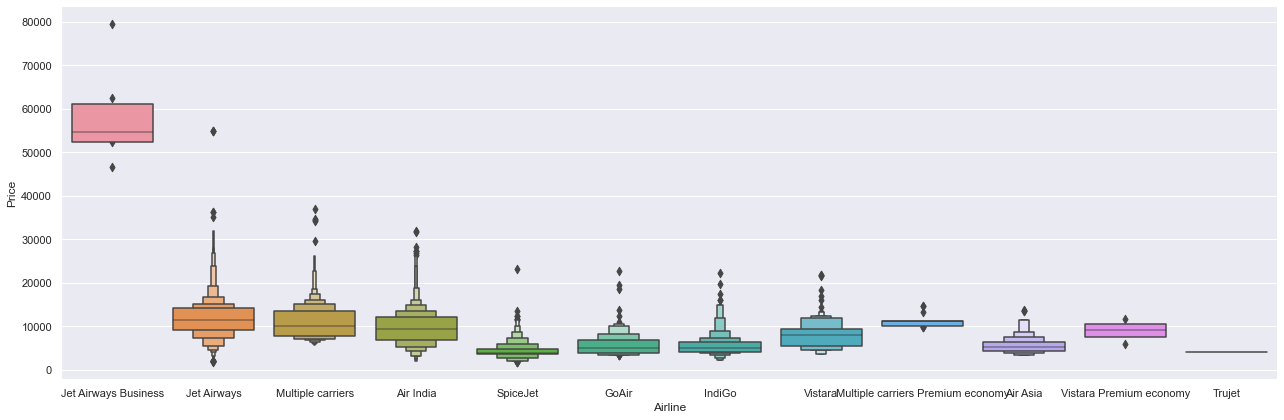

In [20]:
#airline vs price
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [21]:
Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [22]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

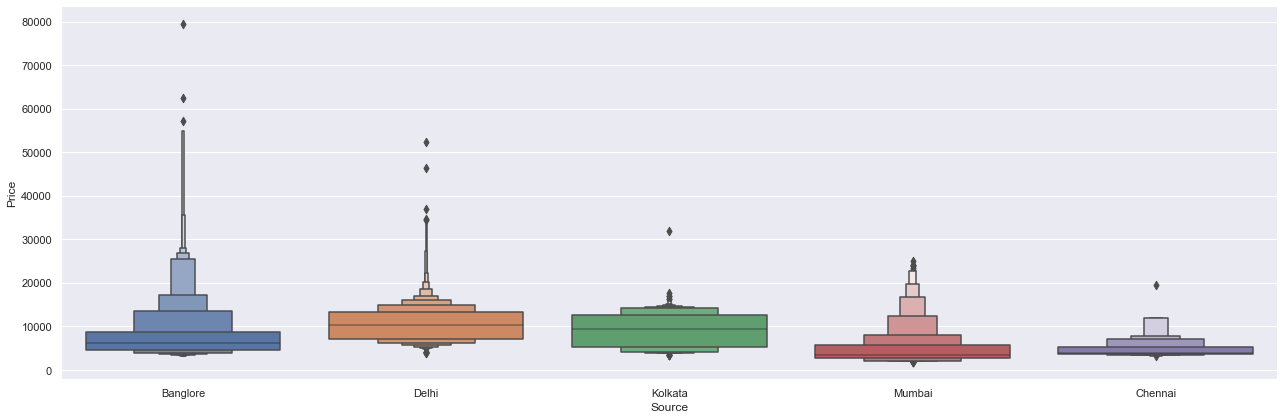

In [23]:
#source vs price
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [24]:
Source=df[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

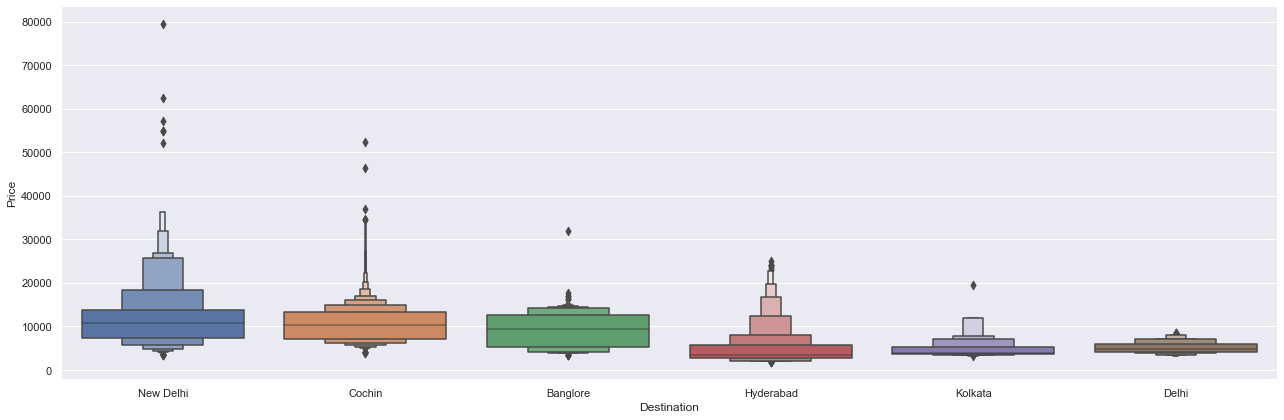

In [26]:
#destination vs price
sns.catplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [27]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [29]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [30]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
#assigning values to corresponding varibales
df['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [32]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [33]:
df_train=pd.concat([df,Airline,Source,Destination],axis=1)
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [123]:
df_train.Airline_Trujet.value_counts()

0    10681
1        1
Name: Airline_Trujet, dtype: int64

In [125]:
df_train.drop('Airline_Trujet',axis=1,inplace=True)

In [126]:
df_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [127]:
df_train.shape

(10682, 29)

### Test Data

In [37]:
df2=pd.read_excel(r'Test_set.xlsx')
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [38]:
df2['Journey_day']=pd.to_datetime(df2["Date_of_Journey"],format= "%d/%m/%Y").dt.day
df2['Journey_month']=pd.to_datetime(df2["Date_of_Journey"],format= "%d/%m/%Y").dt.month
df2.drop(["Date_of_Journey"], axis = 1, inplace = True)
df2["Dep_hour"] = pd.to_datetime(df2["Dep_Time"]).dt.hour

df2["Dep_min"] = pd.to_datetime(df2["Dep_Time"]).dt.minute
df2.drop(["Dep_Time"], axis = 1, inplace = True)

df2["Arrival_hour"] = pd.to_datetime(df2.Arrival_Time).dt.hour
df2["Arrival_min"] = pd.to_datetime(df2.Arrival_Time).dt.minute
df2.drop(["Arrival_Time"], axis = 1, inplace = True)

duration = list(df2["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:     
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"    
        else:
            duration[i] = "0h " + duration[i]  
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
df2["Duration_hours"] = duration_hours
df2["Duration_mins"] = duration_mins
df2.drop(["Duration"], axis = 1, inplace = True)

Airline = df2[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

Source = df2[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

Destination = df2[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

df2.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

df2.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_test = pd.concat([df2, Airline, Source, Destination], axis = 1)

df_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
df_test.shape

(2671, 28)

In [39]:
df_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


### Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,<br>
<ul>  1.heatmap
<br>2.featureimportance
<br>3.SelectKBest

In [128]:
df_test.shape

(2671, 28)

In [129]:
df_train.shape

(10682, 29)

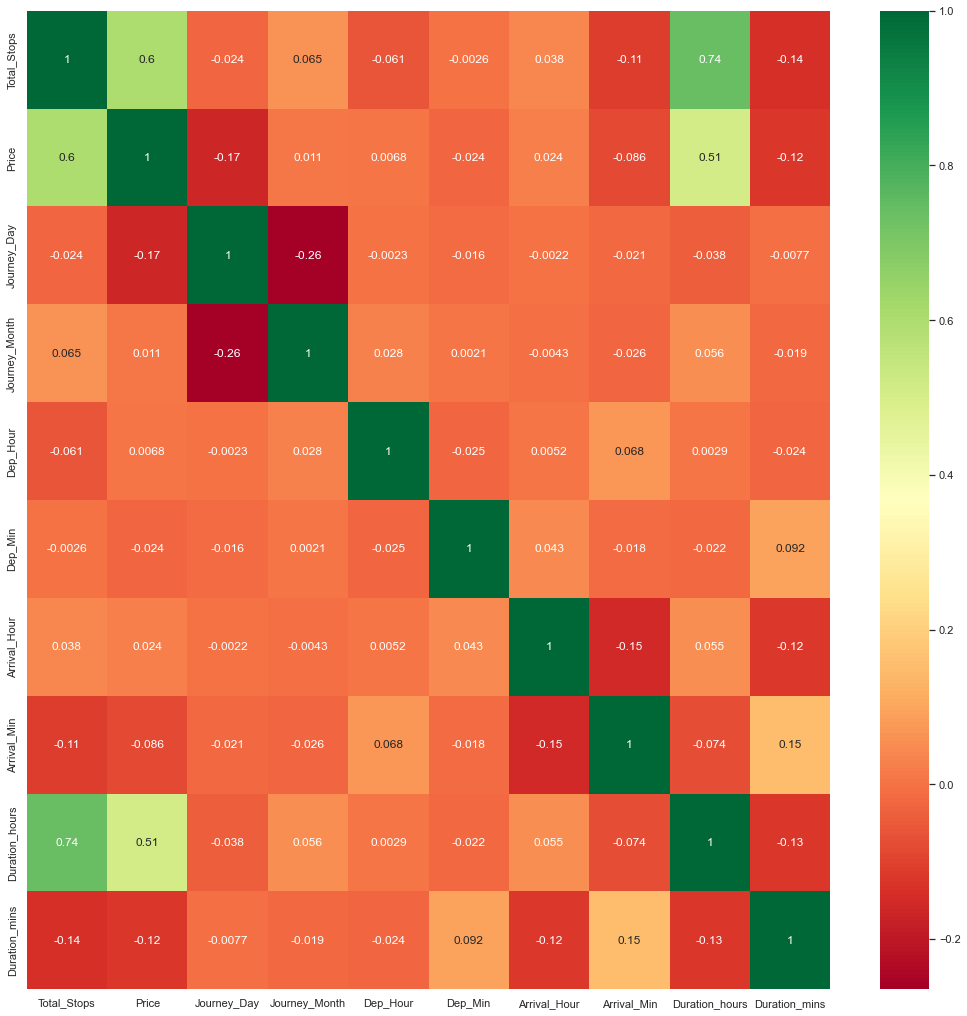

In [130]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

# Model Building

In [95]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [131]:
x=df_train.drop('Price',axis=1)
x.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [132]:
y=df_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [133]:
#creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7477, 28)
(3205, 28)
(7477,)
(3205,)


In [134]:
CV=[]
r2=[]

<b>Random forest Regressor

In [135]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

#prediction
pred_rf=rf.predict(x_test)
r2_=r2_score(y_test,pred_rf)
r2.append(r2_)
print('R2 Score:',r2_)
print('MAE:',mean_absolute_error(y_test,pred_rf))
print('MSE:',mean_squared_error(y_test,pred_rf))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_rf)))

#checking cv score for linear regression
cv=cross_val_score(rf,x,y,cv=5).mean()
print('Cross-validation score :',cv)
CV.append(cv)

R2 Score: 0.7982132958275179
MAE: 1182.3078831736127
MSE: 4116635.7365062926
RMSE: 2028.9494169412633
Cross-validation score : 0.8025702501963481


<B>Gradiant Boosting Regressor

In [136]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

#prediction
pred_gb=gb.predict(x_test)
r2_=r2_score(y_test,pred_gb)
r2.append(r2_)
print('R2 Score:',r2_)
print('MAE:',mean_absolute_error(y_test,pred_gb))
print('MSE:',mean_squared_error(y_test,pred_gb))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_gb)))

#checking cv score for linear regression
cv=cross_val_score(gb,x,y,cv=5).mean()
print('Cross-validation score :',cv)
CV.append(cv)

R2 Score: 0.7919006472611001
MAE: 1482.144429086587
MSE: 4245419.616430849
RMSE: 2060.441607139316
Cross-validation score : 0.7749203480581527


<b>Xgboost Regressor

In [137]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

#prediction
pred_xgb=xgb.predict(x_test)
r2_=r2_score(y_test,pred_xgb)
r2.append(r2_)
print('R2 Score:',r2_)
print('MAE:',mean_absolute_error(y_test,pred_xgb))
print('MSE:',mean_squared_error(y_test,pred_xgb))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_xgb)))

#checking cv score for linear regression
cv=cross_val_score(xgb,x,y,cv=5).mean()
print('Cross-validation score :',cv)
CV.append(cv)

R2 Score: 0.8383723419545166
MAE: 1154.7862227369953
MSE: 3297353.9849737636
RMSE: 1815.8617747432659
Cross-validation score : 0.8337855732937405


<b>Lasso

In [138]:
ls=Lasso()
ls.fit(x_train,y_train)

#prediction
pred_ls=ls.predict(x_test)
r2_=r2_score(y_test,pred_ls)
r2.append(r2_)
print('R2 Score:',r2_)
print('MAE:',mean_absolute_error(y_test,pred_ls))
print('MSE:',mean_squared_error(y_test,pred_ls))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_ls)))

#checking cv score for linear regression
cv=cross_val_score(ls,x,y,cv=5).mean()
print('Cross-validation score :',cv)
CV.append(cv)

R2 Score: 0.6216661755855819
MAE: 1959.4380733309672
MSE: 7718360.574352863
RMSE: 2778.193761124818
Cross-validation score : 0.6144529493068628


Text(0.5, 1.0, 'Random Forest')

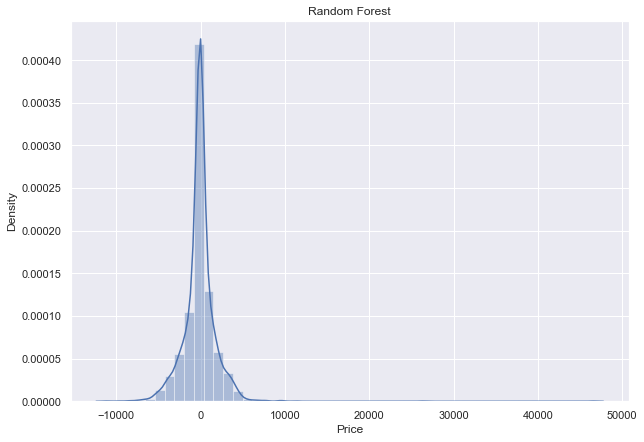

In [139]:
plt.figure(figsize=(10,7))
sns.distplot(y_test-pred_rf)
plt.title('Random Forest')

Text(0.5, 1.0, 'Gradiant Boost')

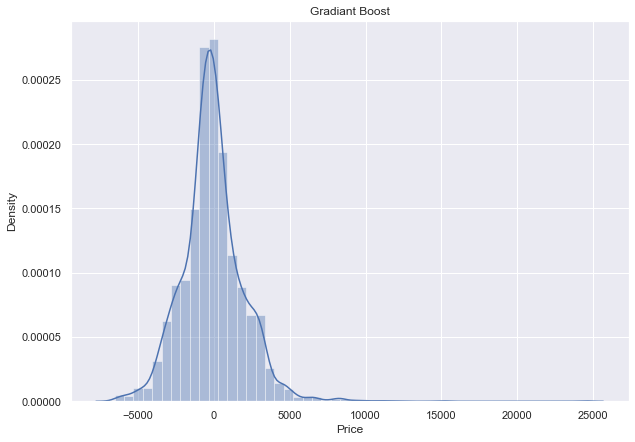

In [140]:
plt.figure(figsize=(10,7))
sns.distplot(y_test-pred_gb)
plt.title('Gradiant Boost')

Text(0.5, 1.0, 'XG Boost')

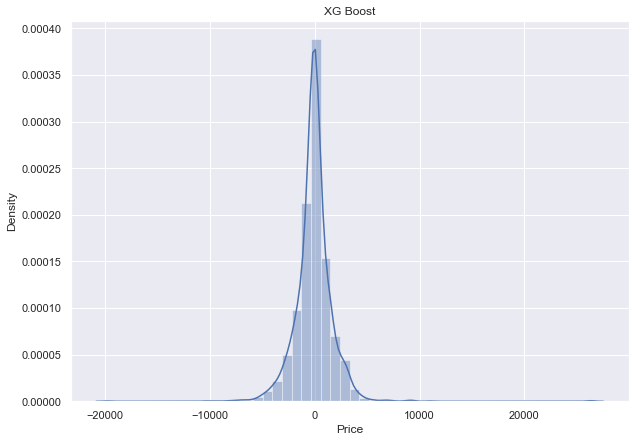

In [141]:
plt.figure(figsize=(10,7))
sns.distplot(y_test-pred_xgb)
plt.title('XG Boost')

Text(0.5, 1.0, 'Lasso')

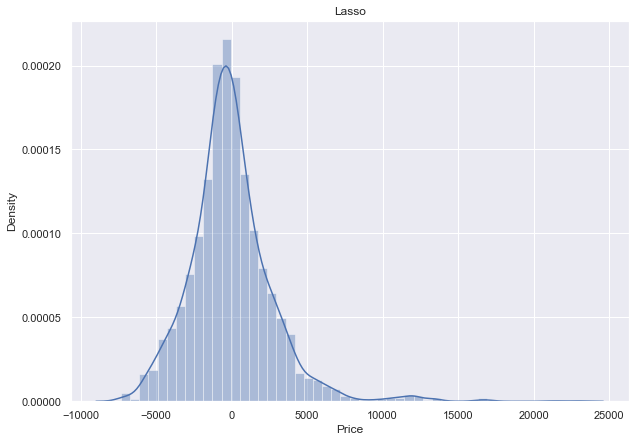

In [142]:
plt.figure(figsize=(10,7))
sns.distplot(y_test-pred_ls)
plt.title('Lasso')

### Cross Validation

In [143]:
model=[rf,gb,xgb,ls]
regression=pd.DataFrame()
regression['Model']=model
regression['R2 Score']=r2
regression['CV Score']=CV
regression['Difference']=[r2[0]-CV[0],r2[1]-CV[1],r2[2]-CV[2],r2[3]-CV[3]]

In [144]:
pd.options.display.float_format = '{:.4f}'.format
regression.sort_values(by="Difference")

,Model,R2 Score,CV Score,Difference
0,"(DecisionTreeRegressor(max_features='auto', ra...",0.7982,0.8026,-0.0044
2,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.8384,0.8338,0.0046
3,Lasso(),0.6217,0.6145,0.0072
1,([DecisionTreeRegressor(criterion='friedman_ms...,0.7919,0.7749,0.0170


Random Forest Regressor is best model with least difference

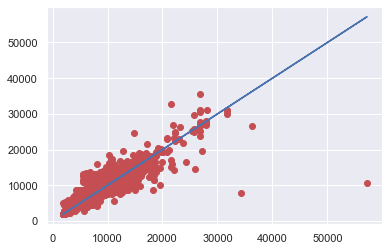

In [145]:
#Random Forest
fig=plt.scatter(x=y_test,y=pred_rf,color='r')
plt.plot(y_test,y_test)

plt.show()


### Hyper parameter tuning

In [146]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2, 5, 10, 15, 50]

In [147]:
rf_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [148]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,scoring='neg_mean_squared_error',n_iter=10,
                             cv=5,verbose=2,random_state=42,n_jobs=1)

In [149]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END max_depth=25, max_features=auto, min_samples_split=5, n_estimators=1000; total time=  24.8s
[CV] END max_depth=25, max_features=auto, min_samples_split=5, n_estimators=1000; total time=  36.2s
[CV] END max_depth=25, max_features=auto, min_samples_split=5, n_estimators=1000; total time=  36.8s
[CV] END max_depth=25, max_features=auto, min_samples_split=5, n_estimators=1000; total time=  37.9s
[CV] END max_depth=25, max_features

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [150]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=25, min_samples_split=5, n_estimators=1000)

In [151]:
final_model=RandomForestRegressor(max_depth=25, min_samples_split=5, n_estimators=1000)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(y_test,pred))

0.811463876562865


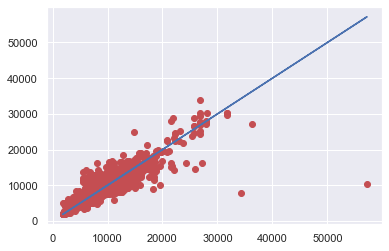

In [152]:
fig=plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test)

plt.show()


<B>Saving the model

In [153]:
import joblib
joblib.dump(final_model,'Flight_Price.pkl')

['Flight_Price.pkl']

### Predictions on test data

In [154]:
model=joblib.load('Flight_Price.pkl')
prediction=model.predict(df_test)

In [160]:
prediction=pd.DataFrame(prediction)
round(prediction)

,0
0,10681.0000
1,4227.0000
2,15217.0000
3,12133.0000
4,3702.0000
...,...
2666,10239.0000
2667,4957.0000
2668,13567.0000
2669,9112.0000


In [161]:
prediction.to_csv('Predicted flight price.csv')